In [1]:
import glob
import os
import numpy as np
import sys

current_dir = "multiple_images"
split_pct = 10
file_train = open("train.txt", "w")  
file_val = open("test.txt", "w")  
counter = 1  
index_test = round(100 / split_pct)  
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):  
        title, ext = os.path.splitext(os.path.basename(pathAndFilename))
        if counter == index_test:
                counter = 1
                file_val.write(current_dir + "/" + title + '.jpg' + "\n")
        else:
                file_train.write(current_dir + "/" + title + '.jpg' + "\n")
                counter = counter + 1
file_train.close()
file_val.close()

Processing C:\Users\vaish\Downloads\New folder\big train data\5000441068_frame60.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000441068_frame60.txt


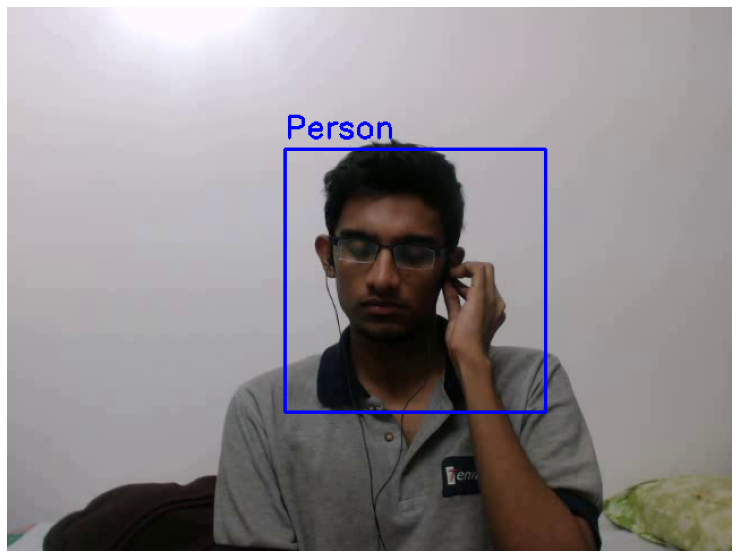

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame0.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame0.txt


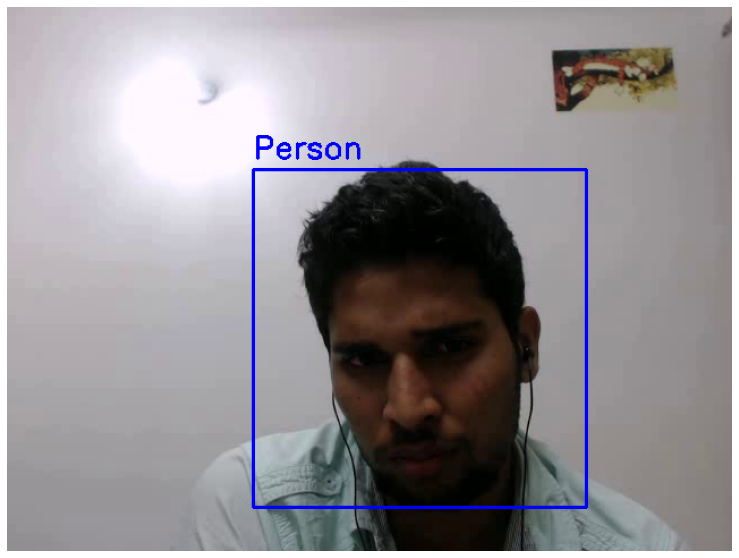

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame120.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame120.txt


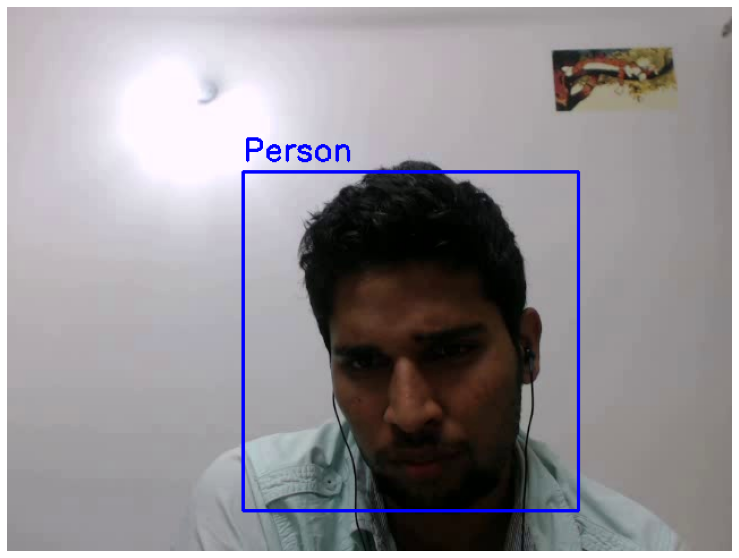

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame150.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame150.txt


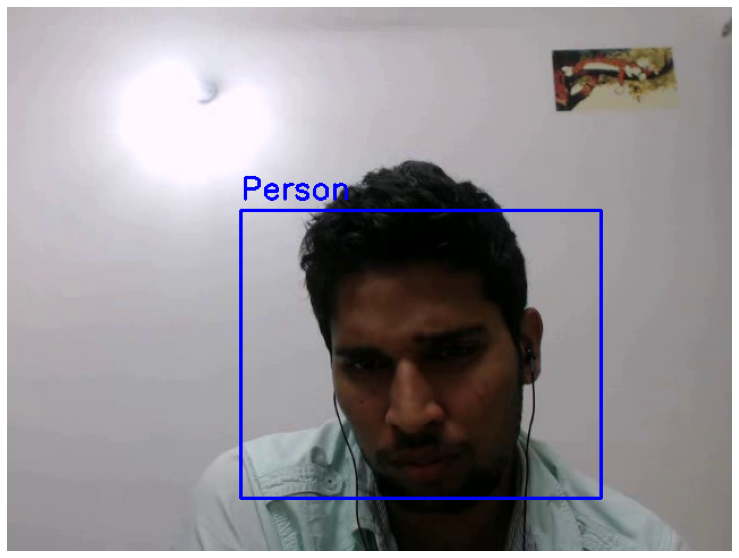

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame180.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame180.txt


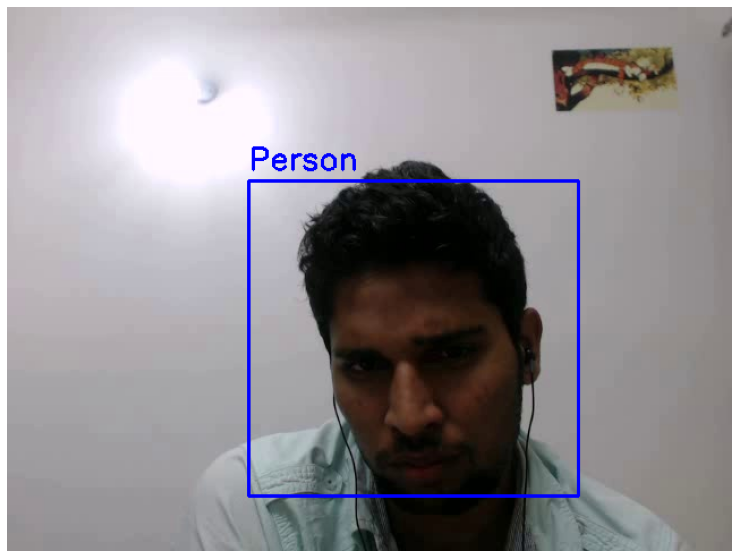

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame210.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame210.txt


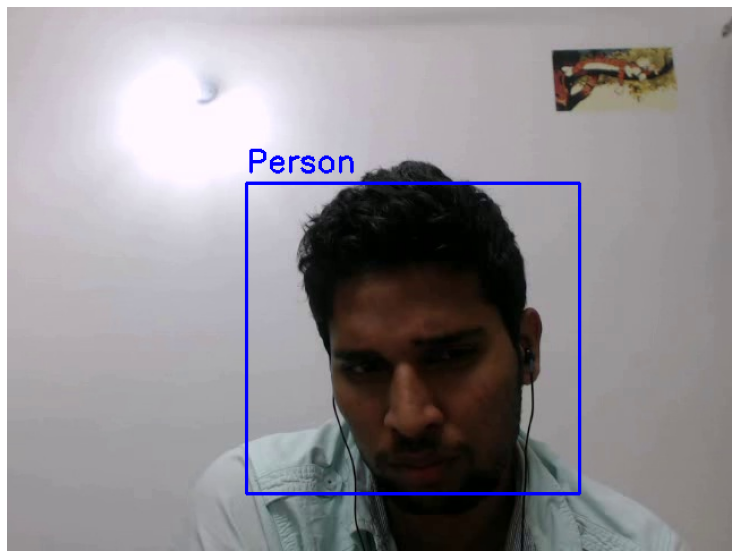

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame240.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame240.txt


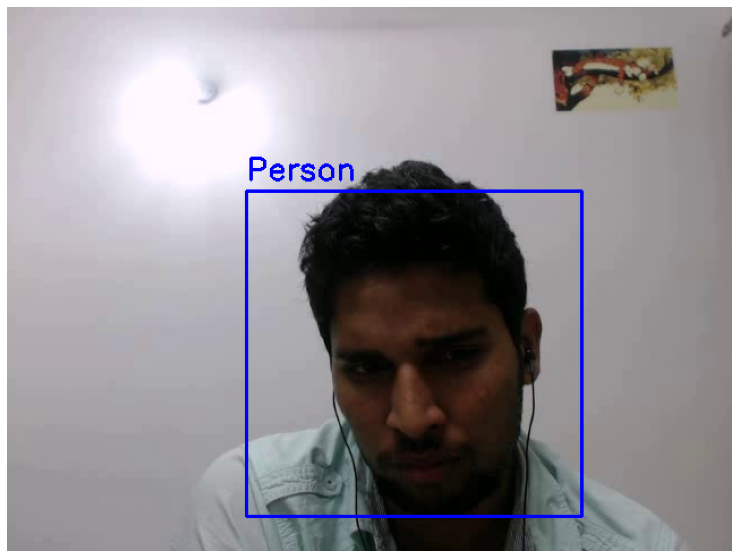

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame270.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame270.txt


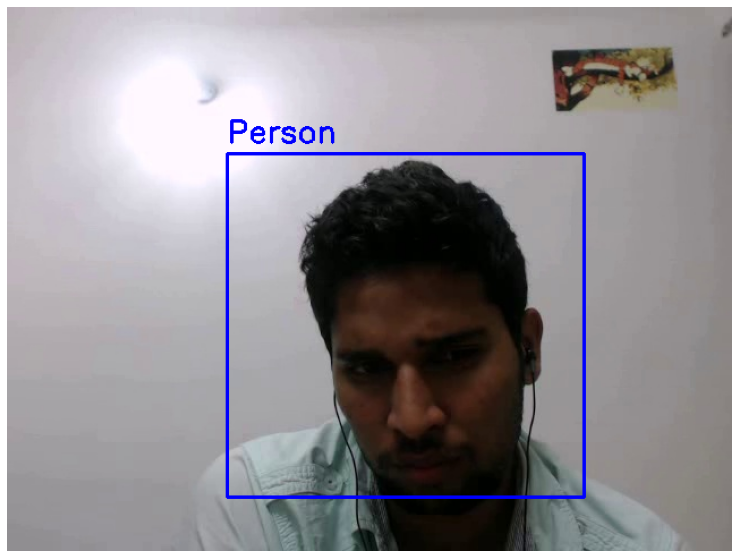

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame30.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame30.txt


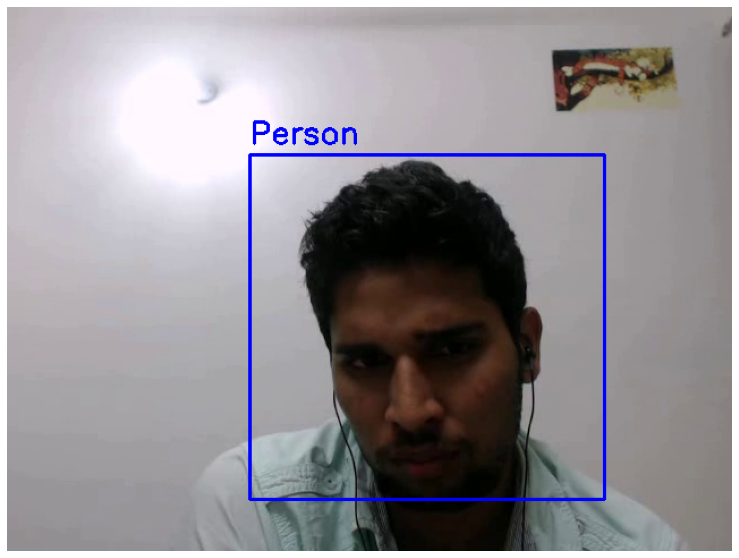

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame60.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame60.txt


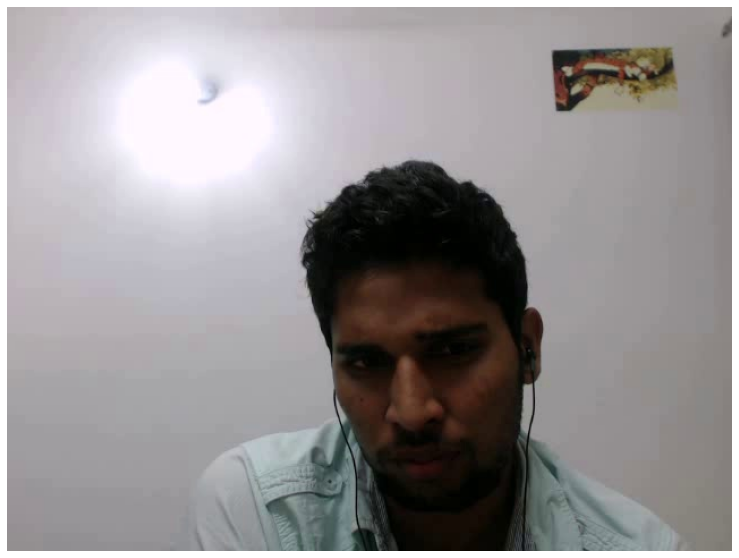

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame90.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame90.txt


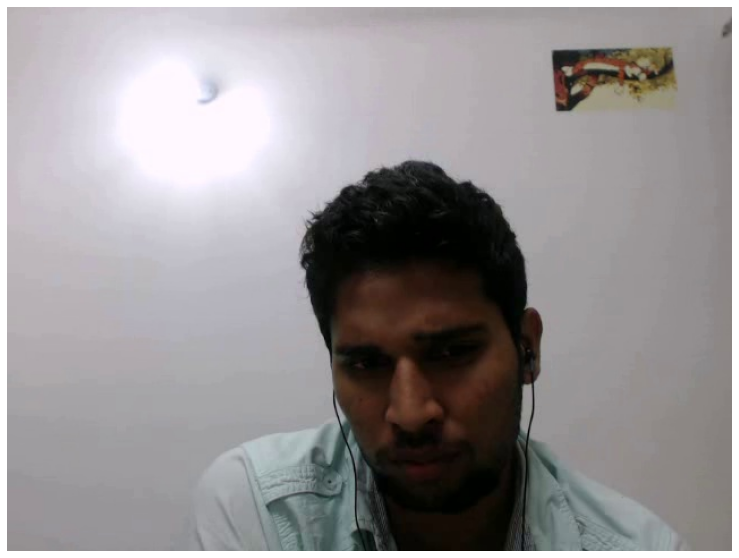

Processing C:\Users\vaish\Downloads\New folder\big train data\5100371056_frame240.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100371056_frame240.txt


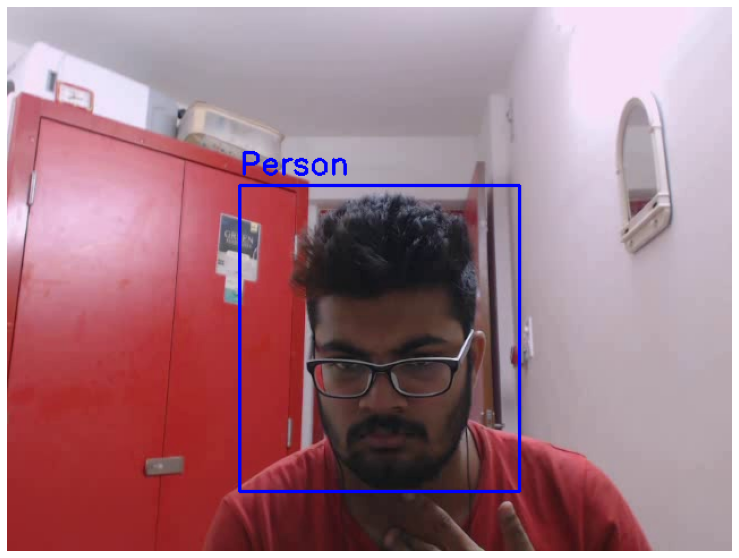

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame0.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame0.txt


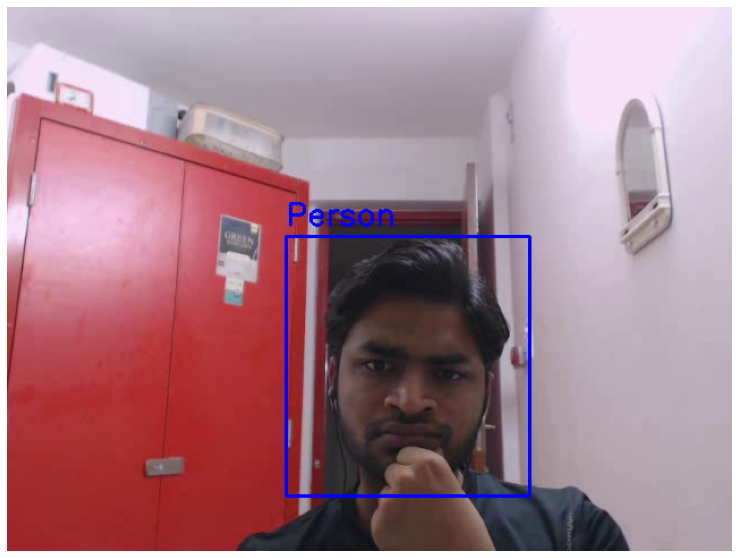

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame120.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame120.txt


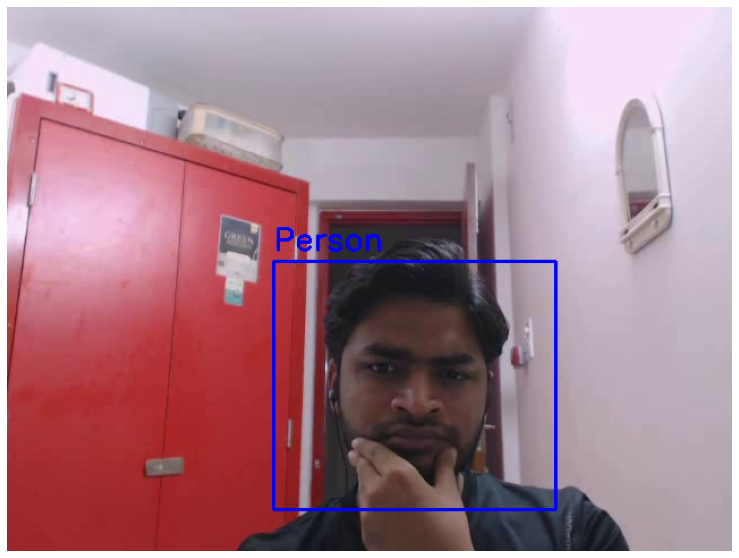

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame150.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame150.txt


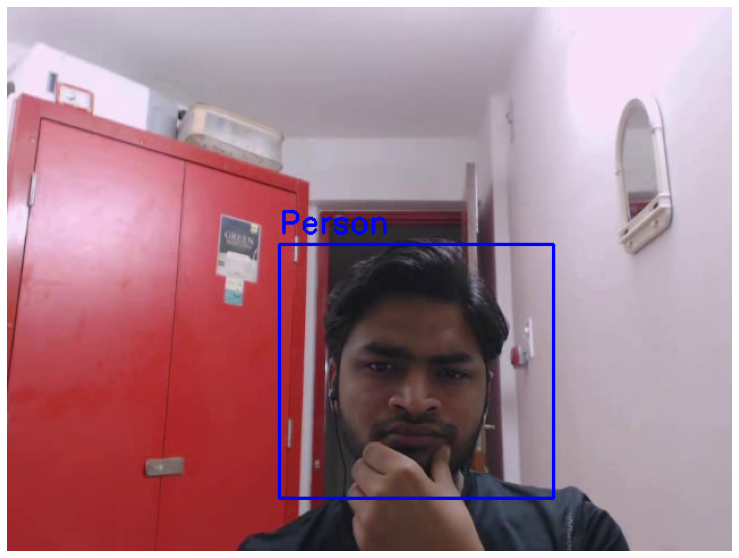

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame210.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame210.txt


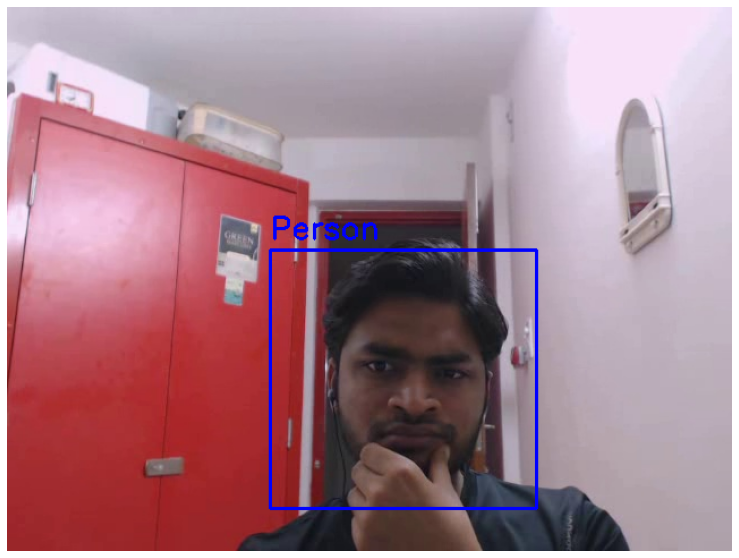

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame270.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame270.txt


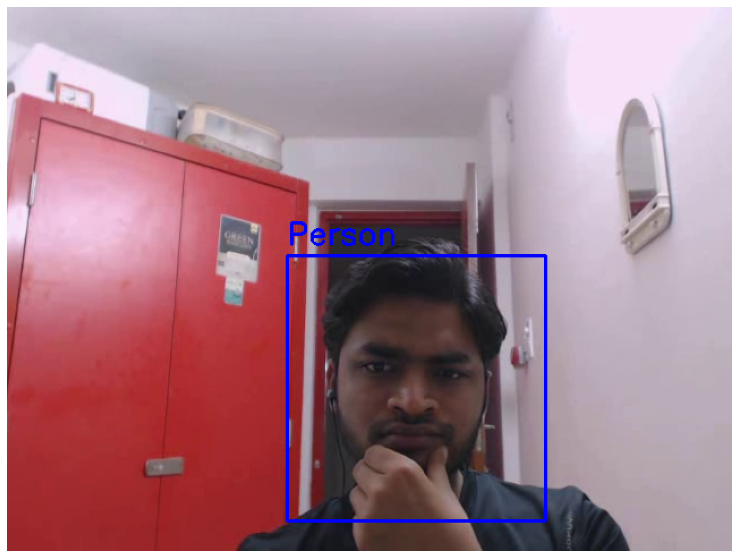

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame60.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame60.txt


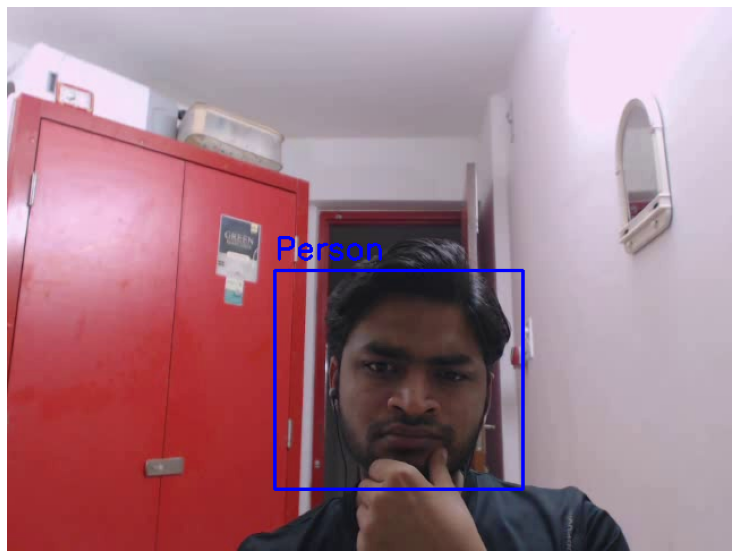

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame90.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame90.txt


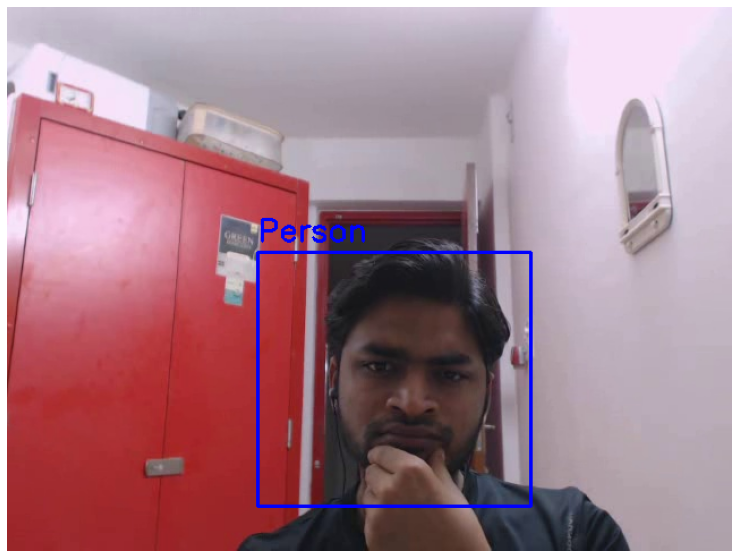

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471059_frame120.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471059_frame120.txt


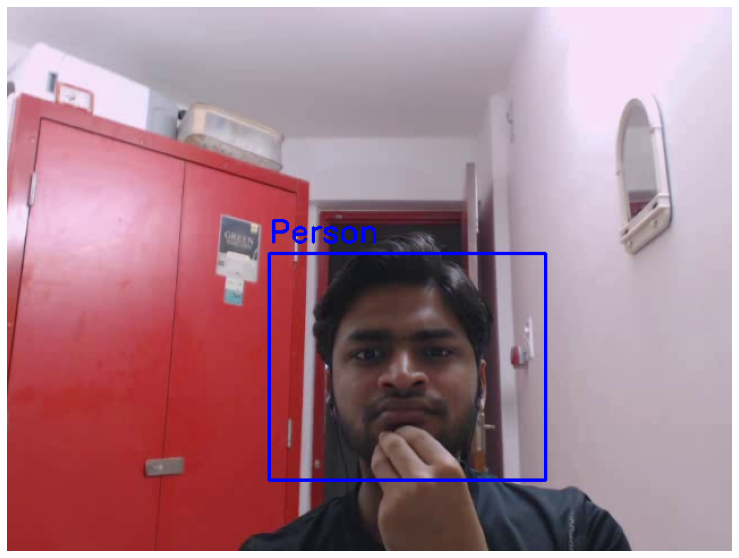

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471059_frame180.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471059_frame180.txt


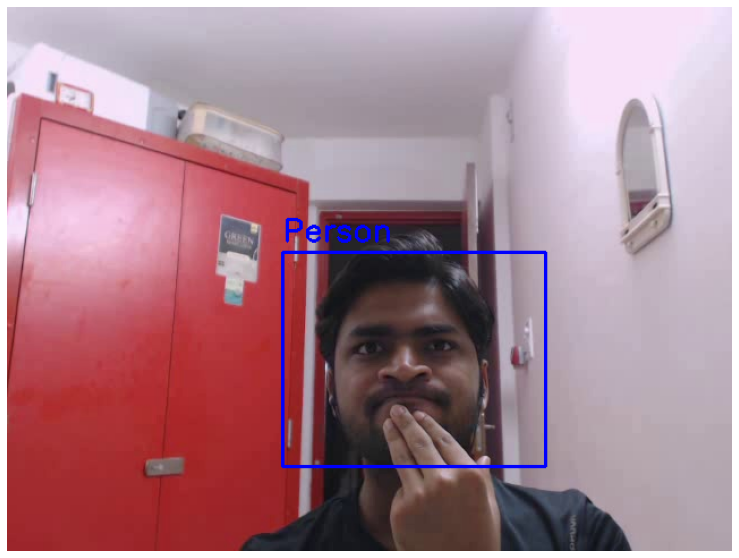

In [4]:
import cv2
import matplotlib.pyplot as plt
import os

def load_labels(label_path):
    bboxes = []
    with open(label_path, 'r') as file:
        labels = file.readlines()
    for line in labels:
        parts = line.strip().split()
        if len(parts) != 4:
            print(f"Invalid label format in line: {line.strip()}")
            continue
        try:
            x1, y1, x2, y2 = map(int, parts)
            bboxes.append((0, (x1, y1, x2, y2)))  # Assuming single class ID 0 for 'Person'
        except ValueError:
            print(f"Error converting label values: {parts}")
    return bboxes

def draw_bboxes(image, bboxes, class_names):
    for bbox in bboxes:
        class_id, (x1, y1, x2, y2) = bbox
        if not (0 <= class_id < len(class_names)):
            print(f"Class ID {class_id} is out of range for class names.")
            continue
        color = (255, 0, 0)  # Red color for bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        label = f"{class_names[class_id]}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

def inshow(image_path, label_path, class_names):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return
    height, width = image.shape[:2]
    resized_image = cv2.resize(image, (1 * width, 1 * height), interpolation=cv2.INTER_CUBIC)
    
    # Load bounding boxes
    bboxes = load_labels(label_path)
    
    # Draw bounding boxes
    draw_bboxes(resized_image, bboxes, class_names)
    
    # Show the image
    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

def process_folder(image_folder, label_folder, class_names):
    for image_filename in os.listdir(image_folder):
        if image_filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(image_folder, image_filename)
            label_filename = os.path.splitext(image_filename)[0] + '.txt'
            label_path = os.path.join(label_folder, label_filename)
            
            if os.path.exists(label_path):
                print(f"Processing {image_path} with labels {label_path}")
                inshow(image_path, label_path, class_names)
            else:
                print(f"No label file found for {image_path}")

# Define class names (add more as needed)
class_names = ["Person"]

# Example usage
image_folder = r"C:\Users\vaish\Downloads\New folder\big train data"
label_folder = r"C:\Users\vaish\Downloads\New folder\big train data\Labels\Person"

# Process all images in the folder
process_folder(image_folder, label_folder, class_names)
